In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,8.0,0.032605,0.416361,-0.326212,-0.166787,-0.093311,0.035848,1.0
Country Code,8.0,0.149154,0.462396,-0.698299,0.037367,0.151500,0.253042,1.0
Longitude,8.0,-0.014517,0.473308,-0.698299,-0.144134,-0.082020,0.043878,1.0
Latitude,8.0,0.088837,0.374640,-0.166688,-0.066833,-0.011223,0.025646,1.0
Average Cost for two,8.0,0.146374,0.350067,-0.111088,0.031995,0.048841,0.069608,1.0
Price range,8.0,0.210704,0.387177,-0.166688,-0.092839,0.159205,0.341569,1.0
Aggregate rating,8.0,0.205388,0.406219,-0.326212,-0.028818,0.166990,0.344754,1.0
Votes,8.0,0.198795,0.365642,-0.147023,-0.038497,0.111157,0.310506,1.0


## In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [10]:
df.shape

(9551, 21)

In [12]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

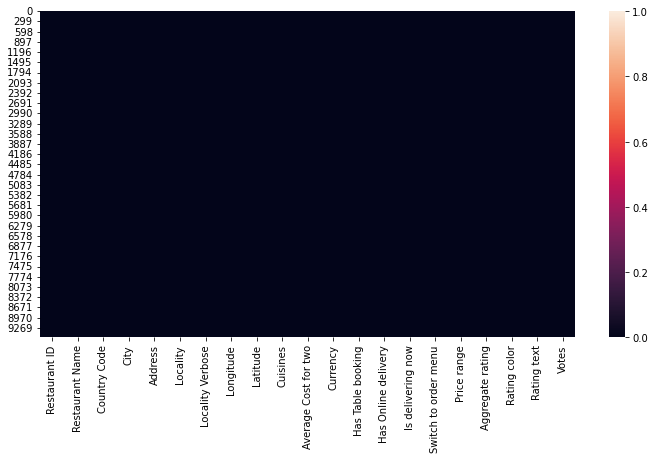

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

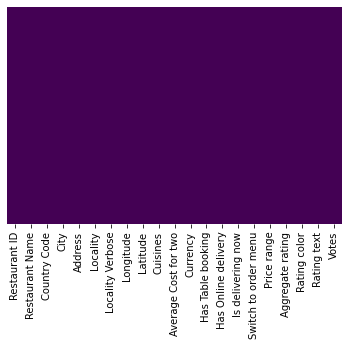

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [18]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
final_df=pd.merge(df,df_country,on='Country Code', how='left') #on--->columns ta kothay add hbe/how---> kon pase add hbe [dan,bam,maje]

In [20]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [21]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [22]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [27]:
country_names=final_df.Country.value_counts().index #index--->for columns

In [29]:
country_val=final_df.Country.value_counts().values #values--->values show korbe

([<matplotlib.patches.Wedge at 0x7fc5b8ed9c50>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

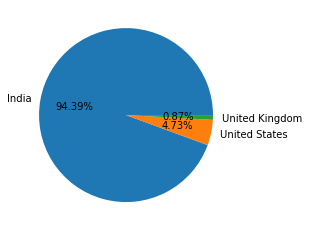

In [31]:
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation:Zomato maximum records or transaction are from India 
After that USA and then United Kingdoms

In [32]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [51]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [55]:
ratings.head(3)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2


## Observation
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

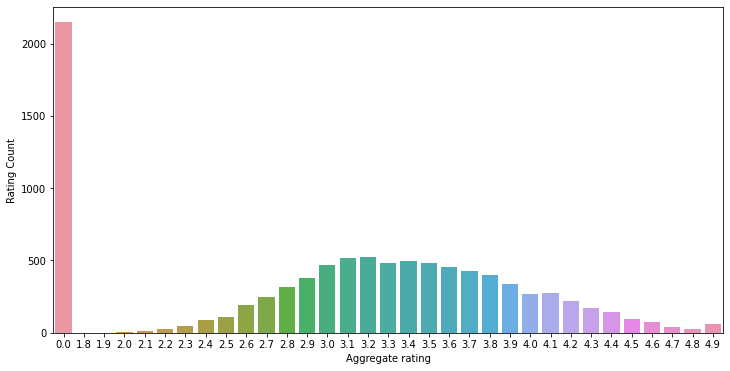

In [56]:
import matplotlib
plt.figure(figsize=(12,6))
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

Observation:
1. Not Rated count is very high
2. Maximum number of rating are between 2.5 to 3.4

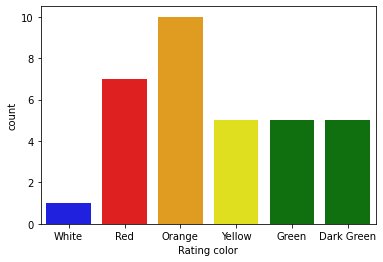

In [57]:
## Count plot
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [58]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [60]:
### Find the countries name that has given 0 rating 
final_df.groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [61]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [62]:
final_df[final_df['Has Online delivery'] =="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [63]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [65]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [66]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [67]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7fc5b8bbde10>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

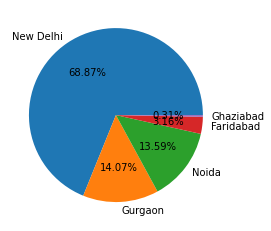

In [68]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')